In [1]:
import os
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.nan)

HOME_PATH = os.path.expanduser('~')
DATA_PATH = HOME_PATH + '/Projects/ssmsi/pickles/corpora/a-to-h/'
OUT_PATH = HOME_PATH + '/Projects/ssmsi/pickles/corpora/synthetic/'

vocab_pickle = pd.read_pickle(DATA_PATH + 'a-to-h_vocab.pkl')
vocab = vocab_pickle.tolist()

In [2]:
def mean_parameter(arr):
    return np.exp(arr) / np.sum(np.exp(arr))

### Corpus parameters

In [8]:
K = 3
V = len(vocab) # 2442
xi = 1000
T = 50

alphas = np.zeros((T, K))
betas = np.zeros((T, K, V))
var_init = 2
var_basic = 0.5

beta_0 = np.zeros((K, V))
for k, beta_0_k in enumerate(beta_0):
    beta_0[k] = np.random.normal(beta_0_k, var_init)
    
print beta_0
return

betas[0] = beta_0
for t in xrange (1, T):
    betas[t] = np.random.normal(betas[t-1], var_basic)
    
alphas[0] = np.random.normal(alphas[0], var_init)
for t in xrange (1, T):
    alphas[t] = np.random.normal(alphas[t-1], var_basic)

[[ -1.39305937e-01  -9.88776471e-01   6.26456428e-01  -2.47616506e-01
   -1.22113604e+00  -5.85215653e-01   2.80883596e+00   1.07456574e+00
    1.11777310e+00   3.52447380e+00  -2.86530060e+00  -2.82493112e+00
   -1.66179454e+00  -2.95903160e+00   7.30615935e-01   7.38031687e-01
   -1.33799580e+00  -2.79469774e-01  -2.07491367e+00   2.90058097e+00
   -5.24166111e-01  -1.49559438e+00   6.54628891e-01   2.10312422e-01
   -5.13506408e-02   4.88402659e-01  -2.47460976e+00  -7.61894550e-02
   -2.20106246e+00  -1.70706435e+00   1.68245470e+00   5.77155359e-01
   -2.28692606e+00  -1.72496246e-01  -7.82770958e-02  -1.48221303e+00
   -2.10110180e+00   1.99579029e+00   6.30283784e-01  -2.56618833e+00
   -5.78669733e-01   1.99049335e-01   1.05784104e+00  -4.09040880e+00
   -4.53775850e+00   3.24546422e+00  -3.34084794e+00   1.83426500e+00
   -7.29344638e-02   1.44051955e+00   1.79605802e+00  -1.98877173e+00
    4.95853895e+00  -3.28972174e+00  -8.46092123e-01   1.74084168e+00
    1.77682967e+00  

SyntaxError: 'return' outside function (<ipython-input-8-06a516c852bf>, line 16)

### Small corpus parameters

In [9]:
# Corpus parameters
K = 2
xi = 1000 # Approximate number of words
T = 25
V = 10
alphas = np.zeros((T, K))
betas = np.zeros((T, K, V))
var_init = 2
var_basic = 0.5

# Initialise the vocabulary
import string
vocab = []
for w in range(V):
    vocab.append(string.ascii_lowercase[w])

# Initialise the parameters at t=0
beta_0 = np.zeros((K, V))
for k, beta_0_k in enumerate(beta_0):
    beta_0[k] = np.random.normal(beta_0_k, var_init)
    
betas[0] = beta_0
for t in xrange (1, T):
    betas[t] = np.random.normal(betas[t-1], var_basic)
    
alphas[0] = np.random.normal(alphas[0], var_init)
for t in xrange (1, T):
    alphas[t] = np.random.normal(alphas[t-1], var_basic)

(25, 2)


### Plot the initial alphas

(25,)
(25,)


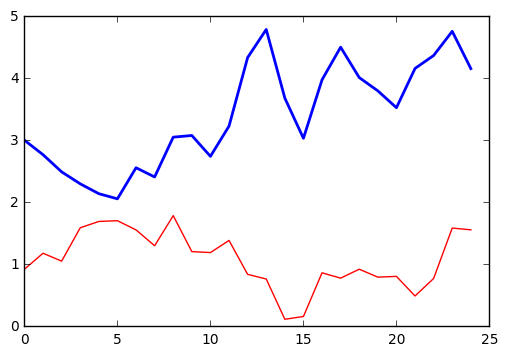

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
alphas_0 = alphas[:, 0]
alphas_1 = alphas[:, 1]
t = np.linspace(0, T-1, num=T)
plt.plot(t, alphas_0, 'b-',linewidth=2)
plt.plot(t, alphas_1,'r-',linewidth=1)

### Plot the initial thetas

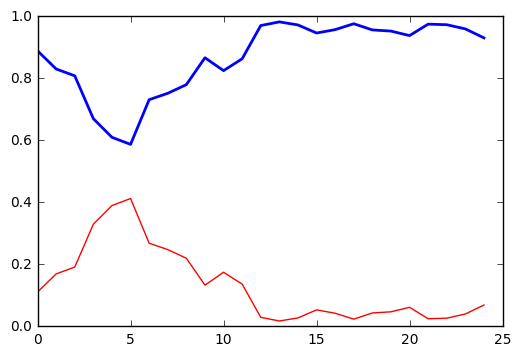

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

thetas = np.zeros(shape=alphas.shape)
for t, alpha_t in enumerate(alphas):
    thetas[t] = mean_parameter(alpha_t)
    
thetas_0 = thetas[:, 0]
thetas_1 = thetas[:, 1]

t = np.linspace(0, T-1, num=T)
plt.plot(t, thetas_0, 'b-',linewidth=2)
plt.plot(t, thetas_1,'r-',linewidth=1)

### Option: Dynamic Generative Process

In [12]:
corpus_dyn = {}
for d in range(T):
    corpus_dyn[d] = {}
    N = np.random.poisson(xi)
    for w in range(N):
        eta = mean_parameter(alphas[d])
        topic_distrib = np.random.multinomial(1, eta)
        z = np.where(topic_distrib == 1)[0][0]
        beta_mp = mean_parameter(betas[d][z])
        word_distrib = np.random.multinomial(1, beta_mp)
        w = np.where(word_distrib == 1)[0][0]
        w_key = vocab[w]
        if w_key not in corpus_dyn[d]:
            corpus_dyn[d][w_key] = 0
        corpus_dyn[d][w_key] += 1

### Dump the corpus

In [13]:
import pickle
name_corpus = 'small-corpus'
with open(OUT_PATH + name_corpus + '_' + str(T) + '.pkl', 'wb') as f_out:
    pickle.dump(corpus_dyn, f_out)
vocab = np.array(vocab)
vocab.dump(open(OUT_PATH + 'vocab_' + name_corpus + '_' + str(T) + '.pkl', 'wb'))

### Option: Static Generative Process

In [7]:
theta = np.random.dirichlet(alpha)
generated_corpus = {}
for i in range(D):
    generated_corpus[i] = {}
    N = np.random.poisson(xi)
    for j in range(N):
        topic_distrib = np.random.multinomial(1, theta)
        z = np.where(topic_distrib == 1)[0][0]
        word_distrib = np.random.multinomial(1, beta[z])
        w = np.where(word_distrib == 1)[0][0]
        w_key = vocab[w]
        if w_key not in generated_corpus[i]:
            generated_corpus[i][w_key] = 0
        generated_corpus[i][w_key] += 1